Here we're gonna make an exploratory data analysis of Monitoring Program of Biodiversity database. Especifically, how the program is covering and operating on National Parks in Brazil. 

In [1]:
#Importing necessaries libraries for analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

#Setting standard size for all charts
sns.set_theme(rc={'figure.figsize':(15,15)})

In [2]:
#Importing dataset to notebook
df_bio = pd.read_csv(r'C:\Users\nicolas.cavalli\Downloads\comob_pda_pda_monitora_csv.csv', on_bad_lines='warn', encoding='ISO-8859-1', delimiter=';')
#Visualizing the first 5 rows
df_bio.head()

,codigo_cnuc,unidade_de_conservacao,categoria_uc_sigla_federal,gerencia_regional_icmbio,coordenacao_regional_icmbio,unidades_da_federacao,bioma_referencial,programa_monitora,projetos_especiais,subprograma_terrestre,...,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119,Unnamed: 120
0,0000.00.0001,APA Anhatomirim,APA,GR 5,GR 5,SC,Marinho-Costeiro,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000.00.1521,APA Bacia do Rio Paraiba do Sul,APA,GR 4,CR - Lagoa Santa,MG/RJ/SP,Mata Atlantica,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000.00.0007,APA Barra do Rio Mamanguape,APA,GR 2,CR - Parnaíba,PB,Marinho-Costeiro,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000.00.0020,APA Carste da Lagoa Santa,APA,GR 4,CR - Lagoa Santa,MG,Cerrado,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0000.00.0002,APA Cavernas do Peruacu,APA,GR 4,CR - Lagoa Santa,MG,Cerrado,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Analysing shape of dataset[number of rows, number os columns]
df_bio.shape

(460, 121)

In [ ]:
#Verifying columns names
df_bio.columns

Index(['codigo_cnuc', 'unidade_de_conservacao', 'categoria_uc_sigla_federal',
       'gerencia_regional_icmbio', 'coordenacao_regional_icmbio',
       'unidades_da_federacao', 'bioma_referencial', 'programa_monitora ',
       'projetos_especiais', 'subprograma_terrestre',
       ...
       'Unnamed: 111', 'Unnamed: 112', 'Unnamed: 113', 'Unnamed: 114',
       'Unnamed: 115', 'Unnamed: 116', 'Unnamed: 117', 'Unnamed: 118',
       'Unnamed: 119', 'Unnamed: 120'],
      dtype='object', length=121)

Now, we're gonna clean "unnamed columns"

In [4]:
#Excluding unnamed columns
df_bio.dropna(axis=1, how='all', inplace=True)

#Verifying columns left in dataset
df_bio.shape

(460, 46)

In [5]:
#Verifying features data types
df_bio.dtypes

codigo_cnuc                                          object
unidade_de_conservacao                               object
categoria_uc_sigla_federal                           object
gerencia_regional_icmbio                             object
coordenacao_regional_icmbio                          object
unidades_da_federacao                                object
bioma_referencial                                    object
programa_monitora                                    object
projetos_especiais                                   object
subprograma_terrestre                                object
 componente_florestal_alvo_global                    object
componente_florestal_alvo_complementar               object
 componente_campestre_savanico                       object
florestal_ea_01_alvo_global_mamiferos_aves           object
florestal_ea_02_alvo_global_mamiferos_aves           object
florestal_ea_03_alvo_global_mamiferos_aves           object
florestal_ea_01_alvo_global_borboletas  

In [26]:
df_bio

,codigo_cnuc,unidade_de_conservacao,categoria_uc_sigla_federal,gerencia_regional_icmbio,coordenacao_regional_icmbio,unidades_da_federacao,bioma_referencial,programa_monitora,projetos_especiais,subprograma_terrestre,...,subprograma_marinho_costeiro,componente_manguezal,componente_praia,componente_ilha,alvo_transversal_pesca_biodiversidade_associada,manguezal_alvo_global_caranguejo_uca,manguezal_alvo_global_vegetacao_de_mangue,praia_alvo_global_aves_limicolas,ilha_alvo_global_aves_marinhas,praia_alvo_global_tartarugas
0,0000.00.0001,APA Anhatomirim,APA,GR 5,GR 5,SC,Marinho-Costeiro,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000.00.1521,APA Bacia do Rio Paraiba do Sul,APA,GR 4,CR - Lagoa Santa,MG/RJ/SP,Mata Atlantica,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000.00.0007,APA Barra do Rio Mamanguape,APA,GR 2,CR - Parnaíba,PB,Marinho-Costeiro,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000.00.0020,APA Carste da Lagoa Santa,APA,GR 4,CR - Lagoa Santa,MG,Cerrado,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0000.00.0002,APA Cavernas do Peruacu,APA,GR 4,CR - Lagoa Santa,MG,Cerrado,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Aparently we need to remove null rows too. Let's do that.

In [6]:
#Excluding null rows
df_bio.dropna(axis=0, how='all', inplace=True)

#Verifying dataset shape
df_bio.shape

(336, 46)

In [7]:
df_bio

,codigo_cnuc,unidade_de_conservacao,categoria_uc_sigla_federal,gerencia_regional_icmbio,coordenacao_regional_icmbio,unidades_da_federacao,bioma_referencial,programa_monitora,projetos_especiais,subprograma_terrestre,...,subprograma_marinho_costeiro,componente_manguezal,componente_praia,componente_ilha,alvo_transversal_pesca_biodiversidade_associada,manguezal_alvo_global_caranguejo_uca,manguezal_alvo_global_vegetacao_de_mangue,praia_alvo_global_aves_limicolas,ilha_alvo_global_aves_marinhas,praia_alvo_global_tartarugas
0,0000.00.0001,APA Anhatomirim,APA,GR 5,GR 5,SC,Marinho-Costeiro,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000.00.1521,APA Bacia do Rio Paraiba do Sul,APA,GR 4,CR - Lagoa Santa,MG/RJ/SP,Mata Atlantica,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000.00.0007,APA Barra do Rio Mamanguape,APA,GR 2,CR - Parnaíba,PB,Marinho-Costeiro,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000.00.0020,APA Carste da Lagoa Santa,APA,GR 4,CR - Lagoa Santa,MG,Cerrado,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0000.00.0002,APA Cavernas do Peruacu,APA,GR 4,CR - Lagoa Santa,MG,Cerrado,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,0000.00.3654,RESEX Arapiranga- Tromaí,RESEX,GR 1,GR 1,MA,Marinho-Costeiro,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
332,0000.00.3693,RESEX Baixo Rio Branco-Jauaperi,RESEX,GR 1,GR 1,AM/ RR,Amazônia,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
333,0000.00.3653,RESEX da Baía do Tubarão,RESEX,GR 1,GR 1,MA,"Marinho-Costeiro, Amazônia e Cerrado",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
334,0000.00.3651,RESEX Itapetininga,RESEX,GR 1,GR 1,MA,Marinho-Costeiro,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's analyse from `categoria_uc_sigla_federal` column which types of conservation unities the Program covers.

In [8]:
#Verifying unique types of conservation unities
df_bio['categoria_uc_sigla_federal'].unique()

array(['APA', 'ARIE', 'ESEC', 'FLONA', 'MONA', 'PARNA', 'RDS', 'REBIO',
       'RESEX', 'RVS'], dtype=object)

I've done some research of which one of them because i confess that i knew very little about it. Below, there are meanings of which one in alphabetical order:

- APA (Área de Preservação Ambiental)
- ARIE (Área de Relevante Interesse Ecológico)
- ESEC (Estação Ecológica)
- FLONA (Floresta Nacional)
- MONA (Monumento Natural)
- PARNA (Parque Nacional)
- RDS (Reserva de Desenvolvimento Sustentável)
- REBIO (Reserva Biológica)
- RESEX (Reserva Extrativista)
- RVS (Refúgio de Vida Silvestre)

In [10]:
#Creating a dataframe to storing absolute quantity and percentage of each unity in descending order
qtde_uc = pd.concat([df_bio['categoria_uc_sigla_federal'].value_counts(), df_bio['categoria_uc_sigla_federal'].value_counts(normalize=True)], axis=1, keys=['Quantidade', 'Porcentagem']).reset_index()
qtde_uc


,categoria_uc_sigla_federal,Quantidade,Porcentagem
0,PARNA,75,0.223214
1,FLONA,68,0.202381
2,RESEX,66,0.196429
3,APA,37,0.110119
4,REBIO,31,0.092262
5,ESEC,30,0.089286
6,ARIE,13,0.038690
7,RVS,9,0.026786
8,MONA,5,0.014881
9,RDS,2,0.005952


Here, we're able to see that over 70% of conservation unities are concentraded in National Parks, National Forests, Extrativists Reserves and Environment Protection Areas. Let's plot a chart to have a better ideia.

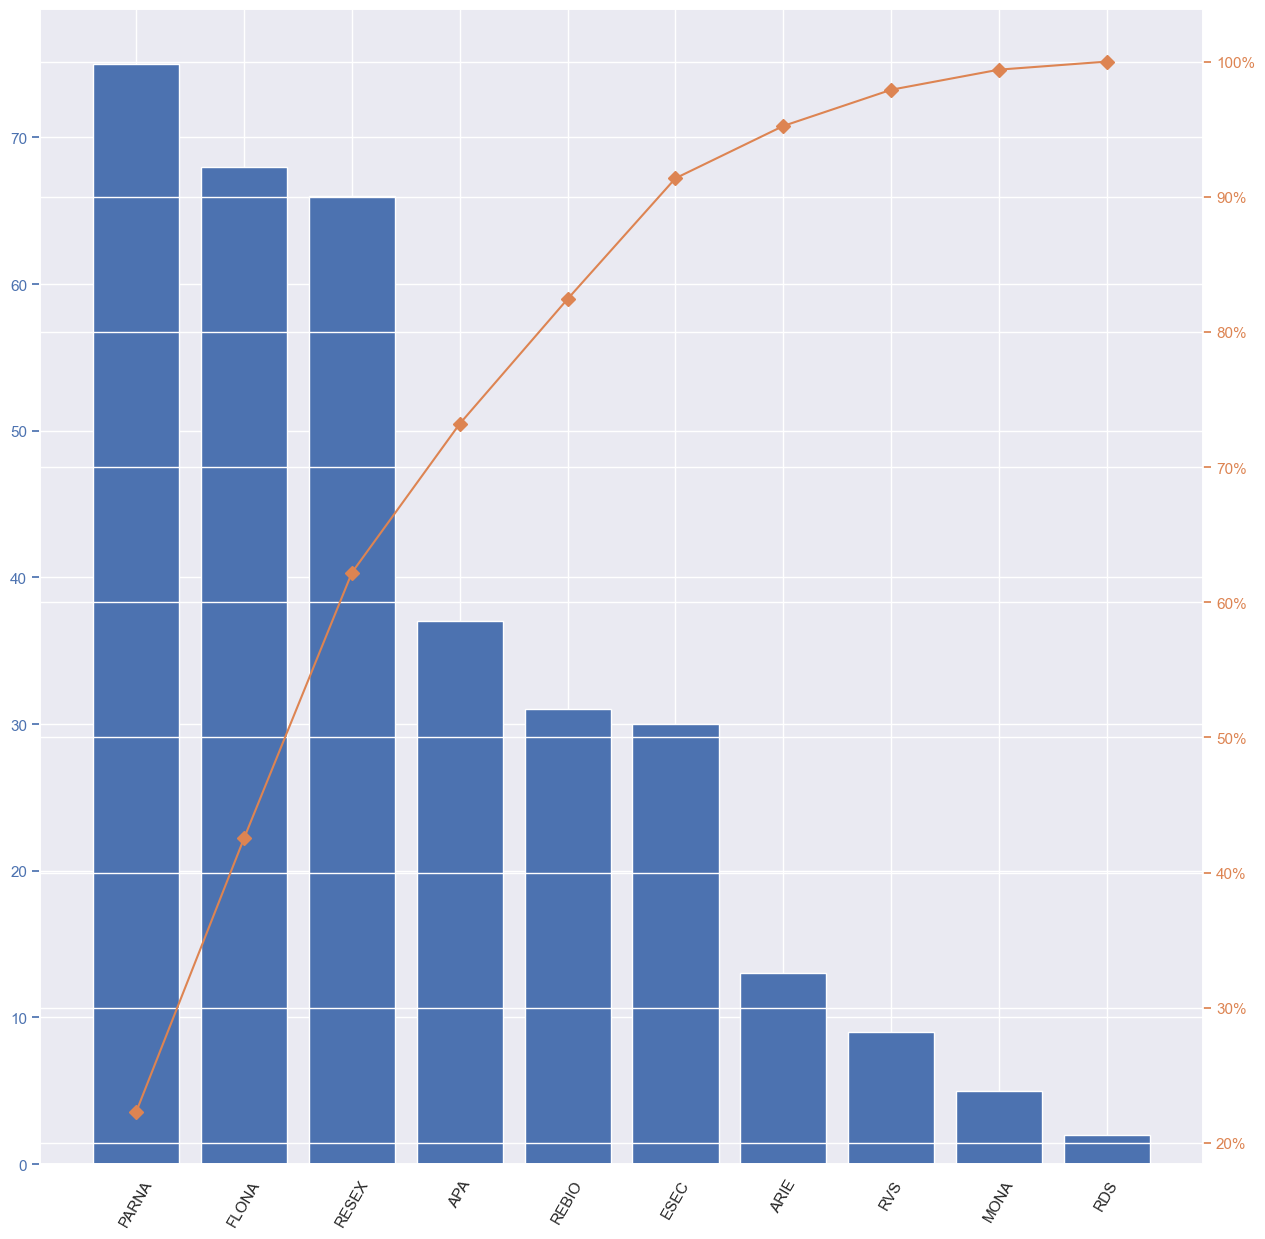

In [11]:
#Calculating cum percentage of each unity
qtde_uc['Porcentagem_Acumulada'] = qtde_uc['Quantidade'].cumsum()/qtde_uc['Quantidade'].sum()*100

#Creating Paretto chart
fig, ax = plt.subplots()
ax.bar(qtde_uc['categoria_uc_sigla_federal'], qtde_uc['Quantidade'], color='C0')
ax2 = ax.twinx()
ax2.plot(qtde_uc['categoria_uc_sigla_federal'], qtde_uc['Porcentagem_Acumulada'], color='C1', marker='D', ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax.tick_params(axis="y", colors="C0")
ax.tick_params(axis='x', rotation=60)
ax2.tick_params(axis="y", colors="C1")
plt.show()

As we said before, we're gonna analyse just National Parks, because it's the most significant percentage of the program.

In [12]:
#Filtering only National Parks in df_bio dataset 
df_parna = df_bio.query("categoria_uc_sigla_federal == 'PARNA'")
df_parna

,codigo_cnuc,unidade_de_conservacao,categoria_uc_sigla_federal,gerencia_regional_icmbio,coordenacao_regional_icmbio,unidades_da_federacao,bioma_referencial,programa_monitora,projetos_especiais,subprograma_terrestre,...,subprograma_marinho_costeiro,componente_manguezal,componente_praia,componente_ilha,alvo_transversal_pesca_biodiversidade_associada,manguezal_alvo_global_caranguejo_uca,manguezal_alvo_global_vegetacao_de_mangue,praia_alvo_global_aves_limicolas,ilha_alvo_global_aves_marinhas,praia_alvo_global_tartarugas
146,0000.00.0135,PARNA Cavernas do Peruacu,PARNA,GR 4,CR - Lagoa Santa,MG,Cerrado,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147,0000.00.0136,PARNA da Amazonia,PARNA,GR 1,GR 1,AM/PA,Amazonia,Operação,ARPA,Operação,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148,0000.00.0272,PARNA da Chapada das Mesas,PARNA,GR 2,CR - Parnaíba,MA,Cerrado,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
149,0000.00.0137,PARNA da Chapada Diamantina,PARNA,GR 2,CR - Parnaíba,BA,Caatinga,NaN,GEF Terrestre,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150,0000.00.0138,PARNA da Chapada dos Guimaraes,PARNA,GR 3,GR 3,MT,Cerrado,Implantação,NaN,Implantação,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,0000.00.0189,PARNA Serra da Mocidade,PARNA,GR 1,GR 1,AM/RR,Amazonia,Operação,ARPA,Operação,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217,0000.00.0147,PARNA Serra de Itabaiana,PARNA,GR 2,CR - Parnaíba,SE,Mata Atlantica,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
323,0000.00.3519,PARNA dos Campos Ferruginosos,PARNA,GR 1,GR 1,PA,Amazonia,Implantação,NaN,Implantação,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
325,0000.00.4581,PARNA da Serra do Teixeira,PARNA,GR 2,GR 2,PB,Caatinga,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's analyse where is concentrate the national parks and which bioms there are in Brazil

In [13]:
#First, let's check how many unique bioms are
df_parna['bioma_referencial'].unique()

array(['Cerrado', 'Amazonia', 'Caatinga', 'Pampas', 'Mata Atlantica',
       'Pantanal', 'Marinho-Costeiro'], dtype=object)

So we have 7 different bioms spread out on National Parks

Now, we're gonna check top 10 states with most National Parks

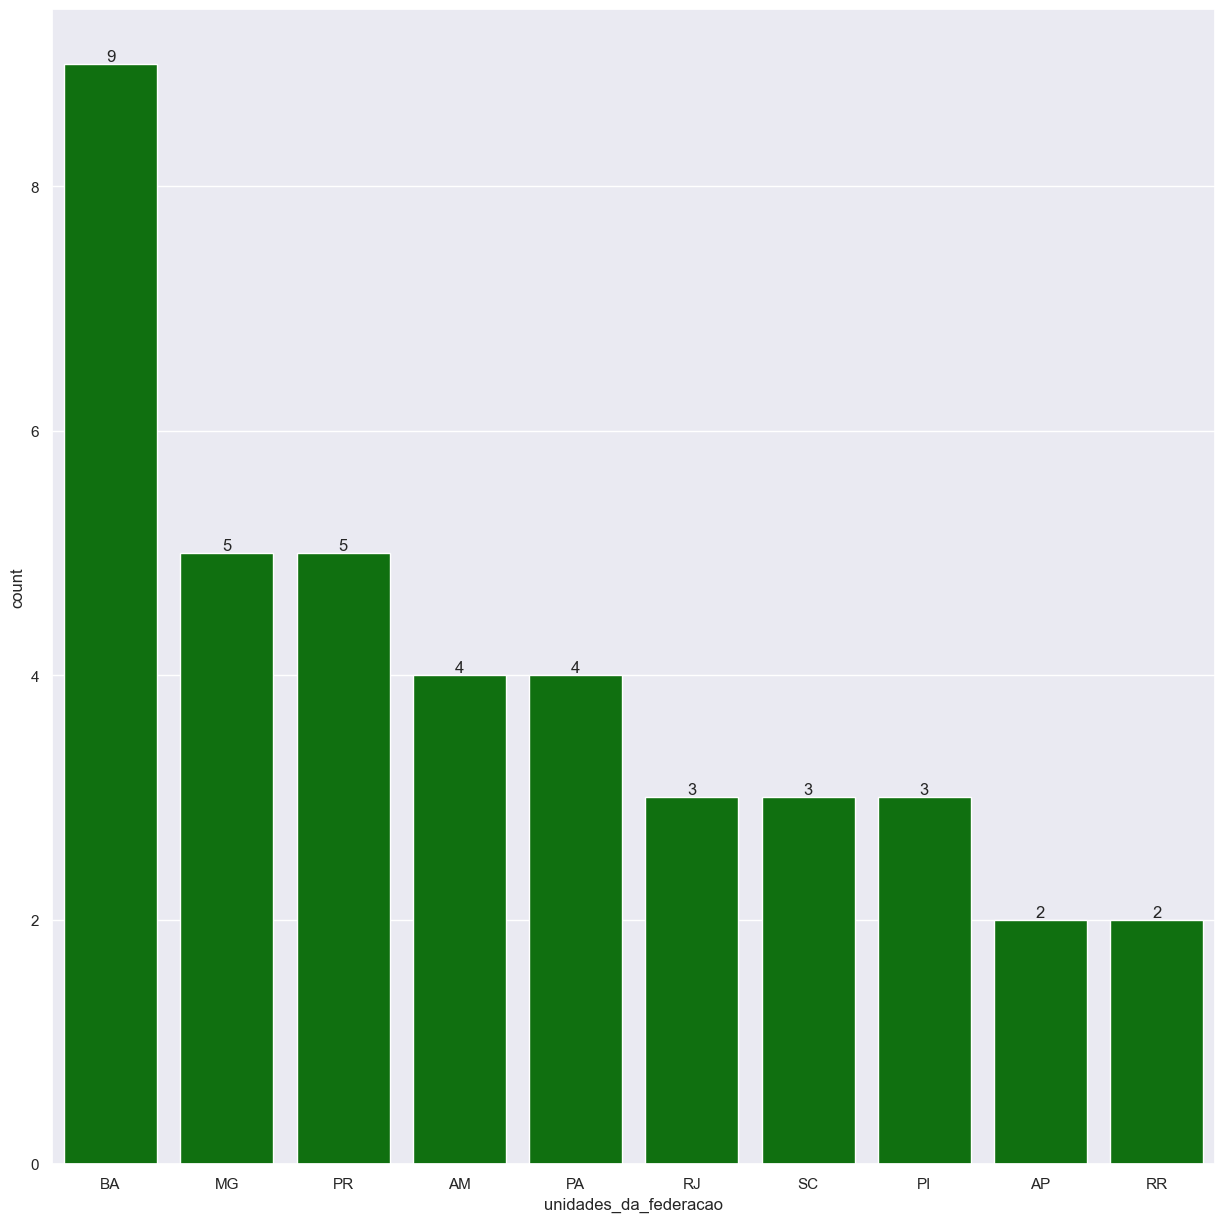

In [ ]:
#Plotting column chart to see top10 states with National Parks.
ax = sns.countplot(data=df_parna, x='unidades_da_federacao',  color='green', order=df_parna['unidades_da_federacao'].value_counts().head(10).index)
for i in ax.containers:
    ax.bar_label(i, )

Notice that Bahia is top1 in National Parks, following by Minas Gerais State.

Let's analyse now bioms in Brazil. 

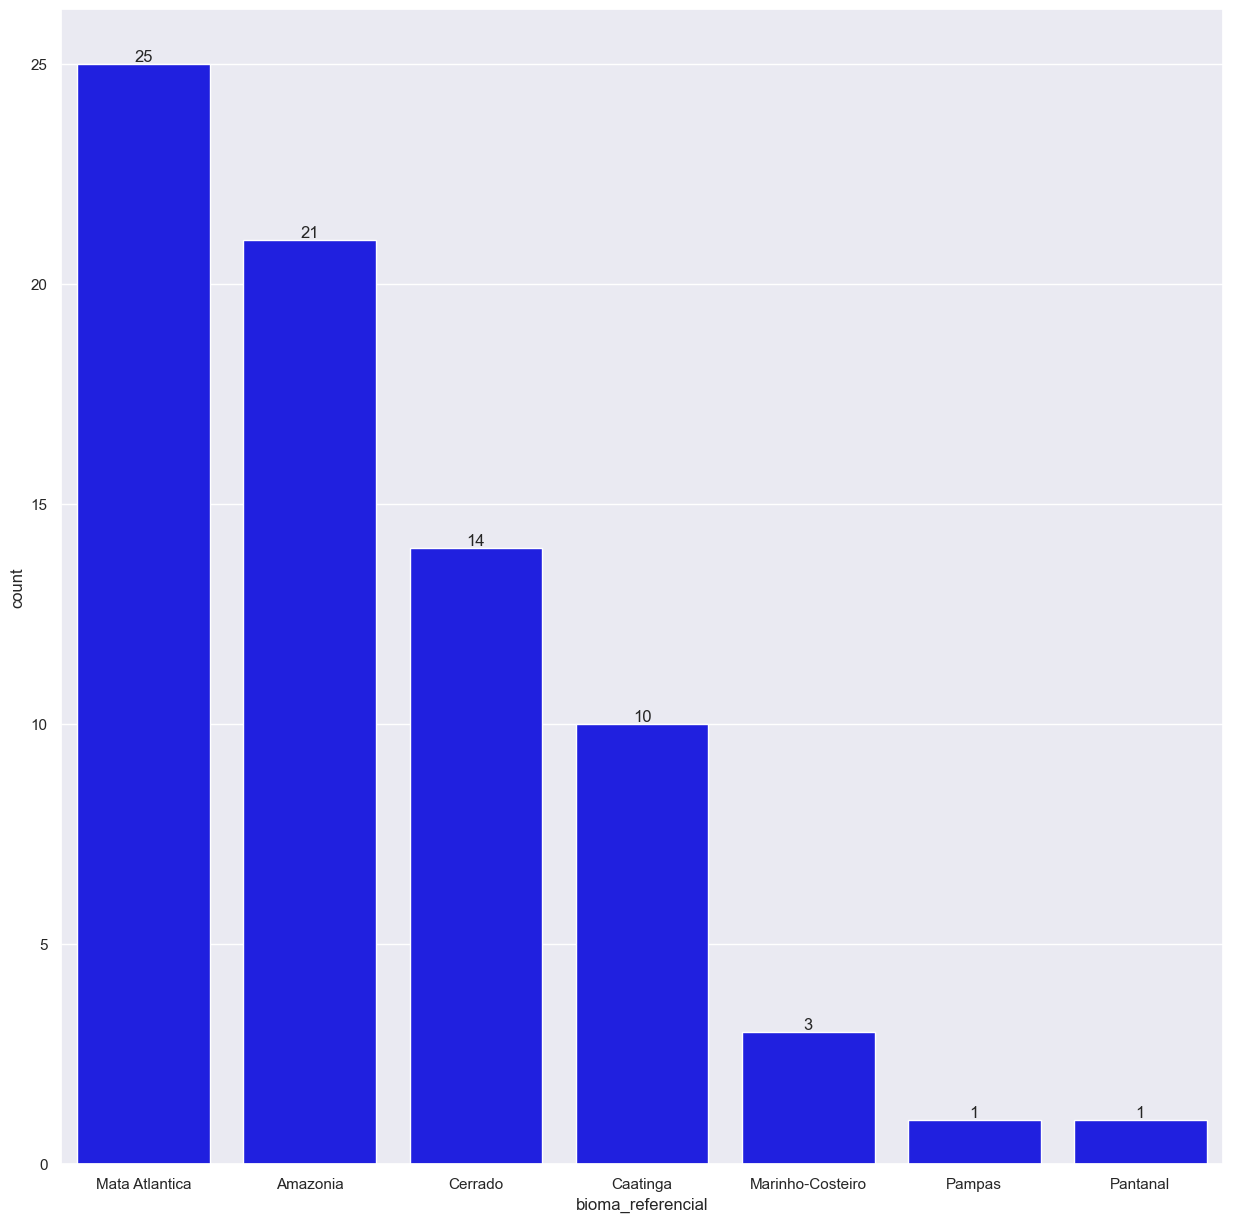

In [ ]:
#Plotting column chart to view bioms
ax = sns.countplot(data=df_parna, x='bioma_referencial',  color='blue', order=df_parna['bioma_referencial'].value_counts().index)
for i in ax.containers:
    ax.bar_label(i, )

Notice that Mata Atlântica is the most present biom in Nationals Parks, which makes sense because is the most deforest biom in Brazil.

In [25]:
#Fill null values in program_monitora column with "Sem programa"
df_parna['programa_monitora '].fillna('Sem programa implementado ou em operação', inplace=True)

C:\Users\nicolas.cavalli\AppData\Local\Temp\ipykernel_16032\1256866558.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_parna['programa_monitora '].fillna('Sem programa implementado ou em operação', inplace=True)


C:\Users\nicolas.cavalli\AppData\Local\Temp\ipykernel_16032\3443372304.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:red'` for the same effect.

  ax = sns.countplot(data=df_parna, x='bioma_referencial', hue='programa_monitora ' ,color='red',order=df_parna['bioma_referencial'].value_counts().index)


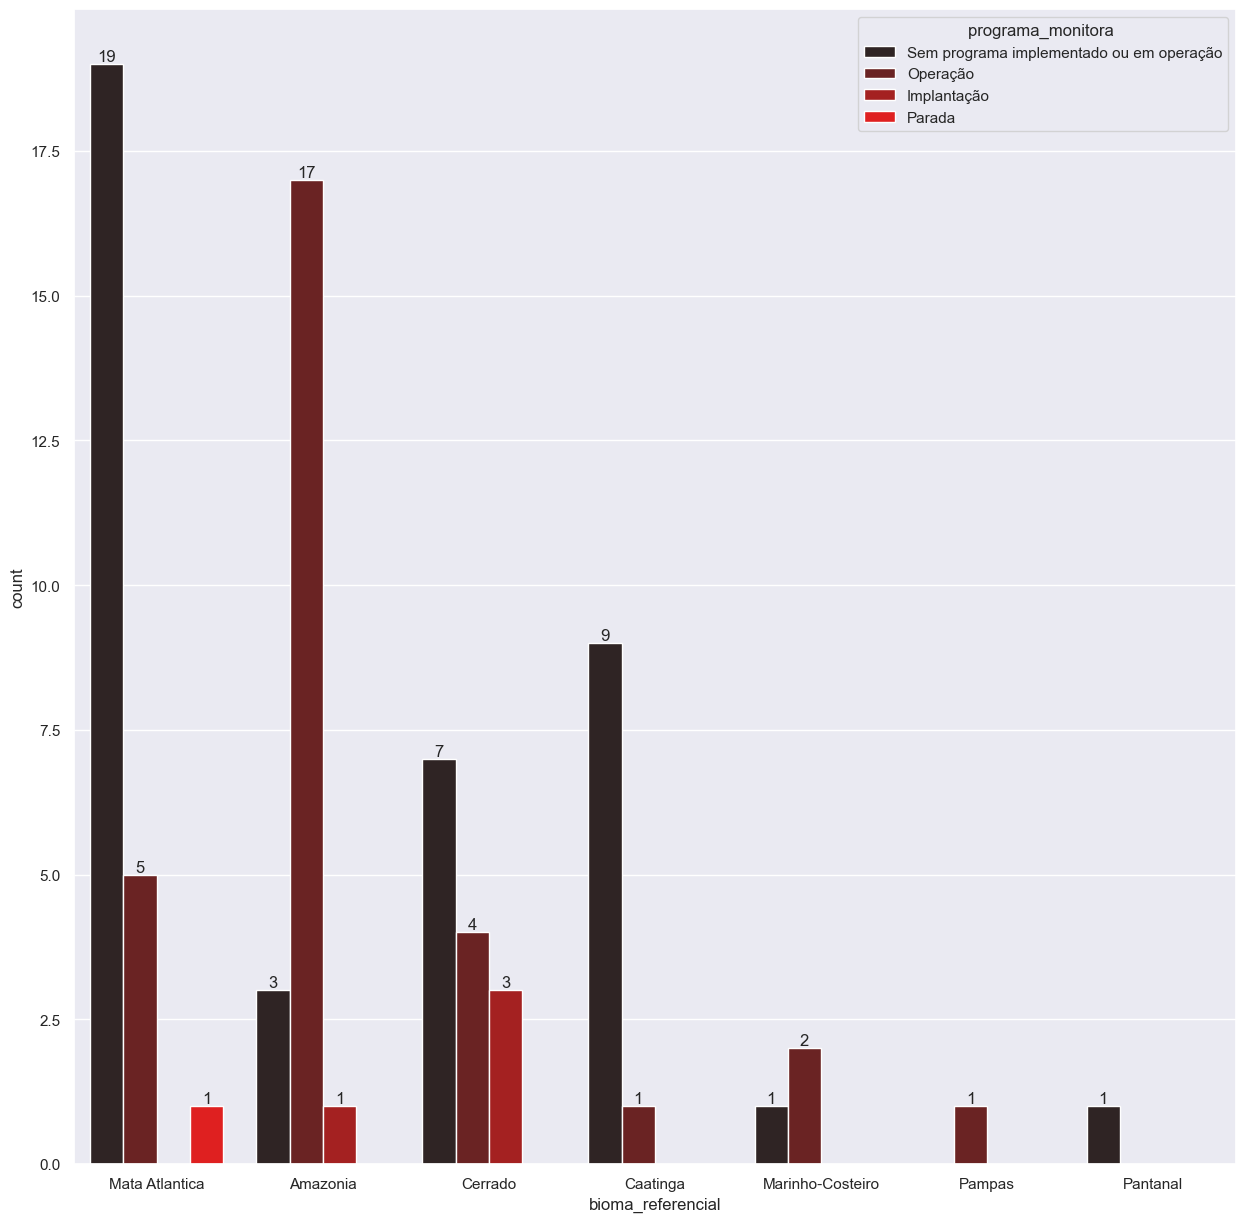

In [ ]:
#Plotting column chart to view bioms and monitoring program status.
ax = sns.countplot(data=df_parna, x='bioma_referencial', hue='programa_monitora ' ,color='red',order=df_parna['bioma_referencial'].value_counts().index)
for i in ax.containers:
    ax.bar_label(i, )

Notice that, despite Mata Atlântica is the most deforest biom, it's low percentage of implemented or operation monitoring programs in National Parks.